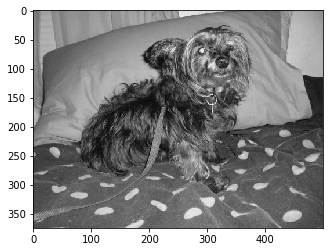

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
data_dir = r'C:\\Users\ASUS\Desktop\neural networks\PetImages'
CATEGORIES = ['dog','cat']

for category in CATEGORIES:
    path = os.path.join(data_dir,category) #path for cats folder and dogs folder in the main data folder(directory)
    
    for img in os.listdir(path): # iteration in list of images in the (path)
        
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)#read the images after joining each image with its path
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

<function matplotlib.pyplot.show(*args, **kw)>

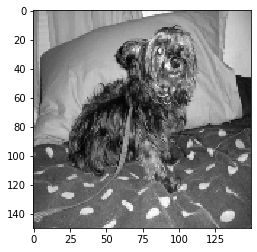

In [2]:
IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show


In [3]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(data_dir,category) #path for cats folder and dogs folder in the main data folder(directory)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path): # iteration in list of images in the (path)
            
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)#read the images after joining each image with its path
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))# resizing the images
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [5]:
import random
random.shuffle(training_data)


In [4]:
print(training_data.shape)

AttributeError: 'list' object has no attribute 'shape'

In [6]:
for sample in training_data[:20]:
    print(sample)

[array([[169, 176, 171, ..., 157, 162, 170],
       [166, 142, 157, ..., 161, 142, 162],
       [169, 180, 172, ..., 187, 157, 162],
       ...,
       [ 76, 141, 148, ..., 170, 180, 186],
       [128, 144,  99, ..., 177, 167, 219],
       [118,  92, 125, ..., 144, 154, 202]], dtype=uint8), 0]
[array([[ 66,  76,  91, ...,  96, 112,  95],
       [ 72,  77,  92, ...,  92,  95, 113],
       [ 69,  76,  92, ...,  84,  91, 101],
       ...,
       [ 76,  40,  65, ...,  62, 116,  42],
       [ 25,  91,  80, ..., 114, 115,  87],
       [ 56,  40,  44, ...,  68,  81,  46]], dtype=uint8), 0]
[array([[ 30,  33,  43, ...,  40,  38,  45],
       [ 30,  32,  43, ...,  41,  43,  60],
       [ 33,  36,  48, ...,  40,  44,  54],
       ...,
       [198, 189, 184, ..., 225, 226, 221],
       [189, 185, 190, ..., 221, 220, 216],
       [189, 208, 217, ..., 219, 216, 216]], dtype=uint8), 1]
[array([[ 36,  39,  36, ...,  41,  34,  24],
       [ 55,  74,  32, ...,  37,  32,  30],
       [120,  59,  48, ...

In [6]:
#CREATING lISTS OF FEATURES(IMAGES) and thier respective labels from the data
X = []
y = []
for features, labels in training_data:
    X.append(features)
    y.append(labels)


In [7]:
print(X.shape)

AttributeError: 'list' object has no attribute 'shape'

In [8]:
print(X[:2])

[array([[117, 113, 110, ..., 140, 137, 134],
       [119, 115, 111, ..., 142, 139, 137],
       [122, 118, 115, ..., 144, 141, 141],
       ...,
       [ 74,  83,  74, ...,  74,  67,  72],
       [ 74,  75,  74, ...,  65,  75,  86],
       [ 71,  73,  70, ...,  91,  84,  73]], dtype=uint8), array([[185, 127, 132, ..., 112, 111, 102],
       [187, 116, 127, ...,  63,  61,  62],
       [179,  84,  80, ...,  90,  94,  74],
       ...,
       [251, 241, 240, ..., 234, 233, 233],
       [252, 240, 237, ..., 237, 234, 232],
       [253, 249, 247, ..., 243, 244, 243]], dtype=uint8)]


In [9]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [10]:
print(X.shape)

(3997, 150, 150, 1)


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle


In [10]:
X = X/255.0 # converting all the pixel values in range 0 to 1

In [11]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5308480   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [14]:
BATCH_SIZE = 10
history = model.fit(X,y,   epochs=10,  batch_size = BATCH_SIZE,  steps_per_epoch = int(np.ceil(2001/float(BATCH_SIZE))),
          validation_split = 0.1,  validation_steps = int(np.ceil(200/float(BATCH_SIZE)))  )   

Train on 3597 samples, validate on 400 samples
Epoch 1/10
2010/3597 [===============>..............] - ETA: 1:00 - loss: 0.0607 - accuracy: 0.9781 - val_loss: 0.4944 - val_accuracy: 0.7200

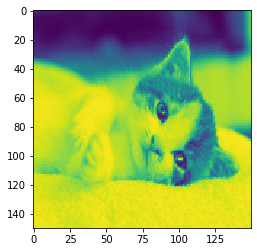

In [75]:
import glob
IMAG_SIZE = 150
img_dir = r'C:\my stuff\cat images for ML'
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img_arra = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    new_arra = cv2.resize(img_arra, (IMAG_SIZE, IMAG_SIZE))
    data.append(new_arra)
    plt.imshow(new_arra)
    plt.show

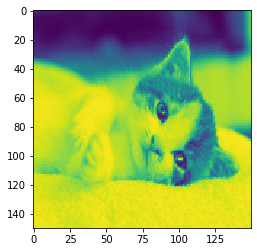

In [76]:

for i in data:
    plt.imshow(i)


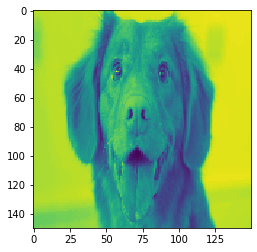

In [78]:

plt.imshow(data[1])

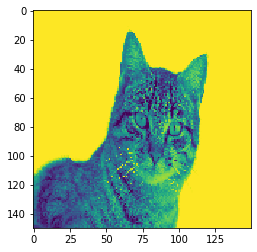

In [79]:
plt.imshow(data[2])

In [80]:
data = np.array(data).reshape(-1,IMAG_SIZE,IMAG_SIZE,1)#reshaping the test data to same size as training data used for CNN

print(data[1])    

[[[208]
  [209]
  [211]
  ...
  [227]
  [227]
  [227]]

 [[208]
  [209]
  [210]
  ...
  [227]
  [227]
  [227]]

 [[208]
  [208]
  [210]
  ...
  [227]
  [227]
  [227]]

 ...

 [[180]
  [181]
  [182]
  ...
  [209]
  [209]
  [209]]

 [[180]
  [182]
  [182]
  ...
  [209]
  [209]
  [209]]

 [[185]
  [185]
  [186]
  ...
  [209]
  [209]
  [209]]]


In [81]:
new_predict = model.predict(data)
print(new_predict.shape)
np.argmax(new_predict[5])


(13, 2)


1

In [82]:
np.argmax(new_predict[2])

0

In [83]:
np.argmax(new_predict[1])

0

In [84]:
np.argmax(new_predict[3])

0

In [85]:
np.argmax(new_predict[4])

0

In [70]:
np.argmax(new_predict[6])

1

In [86]:
np.argmax(new_predict[7])

1

In [87]:
np.argmax(new_predict[8])

0

In [89]:
np.argmax(new_predict[10])

1

In [90]:
np.argmax(new_predict[11])

0

In [91]:
np.argmax(new_predict[12])

0

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

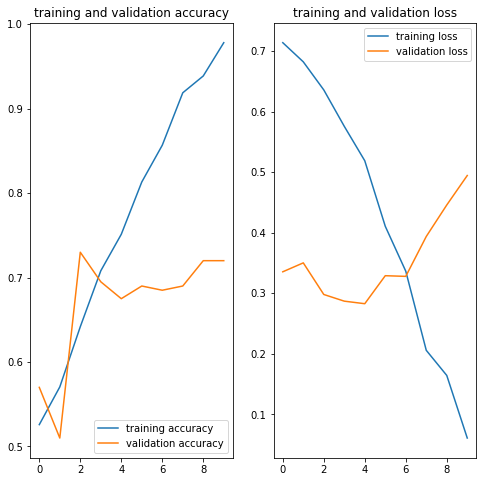

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation accuracy')
plt.legend(loc = 'lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='training loss')
plt.plot(epochs_range,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.imshow